In [188]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline




In [189]:
#Load data

df=pd.read_csv('nyc_sample_data.csv')

In [190]:
#Look at data
df.shape

(1500, 25)

In [191]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lpep_pickup_hour,lpep_pickup_day_of_week,trip_id,driver_id
0,2,2015-09-01 01:17:11,2015-09-01 01:23:01,N,1,-73.830284,40.759506,-73.813698,40.751537,2,...,0.0,NaN,0.3,7.80,2,1.0,1,Tuesday,1,2
1,2,2015-09-01 02:01:29,2015-09-01 02:22:58,N,1,-73.955322,40.720055,-73.906677,40.684845,1,...,0.0,NaN,0.3,22.56,1,1.0,2,Tuesday,2,2
2,2,2015-09-01 04:28:56,2015-09-01 04:28:58,N,5,0.000000,0.000000,-73.939354,40.788391,1,...,0.0,NaN,0.0,15.00,1,2.0,4,Tuesday,3,3
3,2,2015-09-01 06:56:55,2015-09-01 06:59:09,N,1,-73.914764,40.763802,-73.921127,40.766788,1,...,0.0,NaN,0.3,5.38,1,1.0,6,Tuesday,4,5
4,2,2015-09-01 07:54:44,2015-09-01 07:57:07,N,1,-73.894241,40.864166,-73.897781,40.870739,1,...,0.0,NaN,0.3,6.24,1,1.0,7,Tuesday,5,2


In [192]:
df.dtypes

VendorID                     int64
lpep_pickup_datetime        object
Lpep_dropoff_datetime       object
Store_and_fwd_flag          object
RateCodeID                   int64
Pickup_longitude           float64
Pickup_latitude            float64
Dropoff_longitude          float64
Dropoff_latitude           float64
Passenger_count              int64
Trip_distance              float64
Fare_amount                float64
Extra                      float64
MTA_tax                    float64
Tip_amount                 float64
Tolls_amount               float64
Ehail_fee                  float64
improvement_surcharge      float64
Total_amount               float64
Payment_type                 int64
Trip_type                  float64
lpep_pickup_hour             int64
lpep_pickup_day_of_week     object
trip_id                      int64
driver_id                    int64
dtype: object

In [193]:
#look at missing values
df.isna().sum()

VendorID                      0
lpep_pickup_datetime          0
Lpep_dropoff_datetime         0
Store_and_fwd_flag            0
RateCodeID                    0
Pickup_longitude              0
Pickup_latitude               0
Dropoff_longitude             0
Dropoff_latitude              0
Passenger_count               0
Trip_distance                 0
Fare_amount                   0
Extra                         0
MTA_tax                       0
Tip_amount                    0
Tolls_amount                  0
Ehail_fee                  1500
improvement_surcharge         0
Total_amount                  0
Payment_type                  0
Trip_type                     0
lpep_pickup_hour              0
lpep_pickup_day_of_week       0
trip_id                       0
driver_id                     0
dtype: int64

In [194]:
#drop the column that has lots of missing values
df.drop(columns=['Ehail_fee'], inplace = True)

In [195]:
#Check the columns again
#now Ehail_fee is dropped
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type ', 'lpep_pickup_hour',
       'lpep_pickup_day_of_week', 'trip_id', 'driver_id'],
      dtype='object')

In [196]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,lpep_pickup_hour,trip_id,driver_id
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.787333,1.105333,-73.835784,40.695845,-73.884180,40.720958,1.328667,3.034160,12.596333,0.334667,0.485667,1.292307,0.167320,0.292000,15.168293,1.514667,1.023333,13.505333,750.500000,2.986000
std,0.409330,0.630214,2.699145,1.488586,1.909684,1.053704,0.959822,3.262472,9.580610,0.357888,0.087367,2.445532,1.119411,0.050771,11.323701,0.514420,0.151010,6.780803,433.157015,1.438698
min,1.000000,1.000000,-74.016907,0.000000,-74.177361,0.000000,1.000000,0.000000,-6.000000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-6.800000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,-73.959330,40.702127,-73.966167,40.702130,1.000000,1.100000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,1.000000,1.000000,9.000000,375.750000,2.000000
50%,2.000000,1.000000,-73.945248,40.747002,-73.945557,40.750408,1.000000,2.000000,9.500000,0.500000,0.500000,0.000000,0.000000,0.300000,11.800000,2.000000,1.000000,15.000000,750.500000,3.000000
75%,2.000000,1.000000,-73.914042,40.803554,-73.910679,40.791574,1.000000,3.682500,15.000000,0.500000,0.500000,2.000000,0.000000,0.300000,17.800000,2.000000,1.000000,19.000000,1125.250000,4.000000
max,2.000000,5.000000,0.000000,40.882481,0.000000,40.911461,6.000000,43.530000,90.500000,1.000000,0.500000,45.800000,22.830000,0.300000,136.360000,4.000000,2.000000,23.000000,1500.000000,5.000000


In [197]:
#To drop the rows we use np.where functions
df.drop(df.index[np.where(df['Total_amount'] <= 0)], inplace = True) 

In [198]:
len(df)

1495

In [199]:
#correlation matrix

df.corr()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,lpep_pickup_hour,trip_id,driver_id
VendorID,1.000000,0.032043,-0.024780,0.029174,0.014001,-0.008222,0.068550,-0.022740,-0.025383,-0.015528,-0.027887,-0.027279,-0.008799,-0.022026,-0.029032,-0.015278,0.031287,-0.022261,0.051442,0.007711
RateCodeID,0.032043,1.000000,0.116404,-0.108700,-0.001699,0.010942,0.010164,0.149905,0.140014,-0.151121,-0.982076,0.059195,0.143809,-0.936798,0.130467,0.072921,0.951742,-0.051303,-0.017181,0.040591
Pickup_longitude,-0.024780,0.116404,1.000000,-0.999003,-0.000856,0.002532,-0.011414,-0.026237,-0.008849,-0.008926,-0.114899,-0.021132,-0.005120,-0.120274,-0.014109,-0.033465,0.122277,-0.009027,-0.005754,0.001151
Pickup_latitude,0.029174,-0.108700,-0.999003,1.000000,0.002061,-0.001349,0.012932,0.025818,0.007477,0.006139,0.107566,0.015169,0.007424,0.113236,0.011718,0.040338,-0.114769,0.008172,0.006635,0.000882
Dropoff_longitude,0.014001,-0.001699,-0.000856,0.002061,1.000000,-0.997944,-0.008365,-0.009648,-0.013064,-0.023291,0.002594,-0.017160,-0.006606,0.001317,-0.016145,0.030382,-0.001180,0.015385,-0.006073,0.001822
Dropoff_latitude,-0.008222,0.010942,0.002532,-0.001349,-0.997944,1.000000,0.008677,0.006757,0.008223,0.019916,-0.010472,0.006112,0.005447,-0.010256,0.009344,-0.020452,0.010858,-0.019229,0.007111,0.000373
Passenger_count,0.068550,0.010164,-0.011414,0.012932,-0.008365,0.008677,1.000000,0.039221,-0.000381,0.062166,-0.009665,-0.026238,0.007791,-0.014771,-0.003389,0.037638,0.002152,0.020352,0.000297,0.021573
Trip_distance,-0.022740,0.149905,-0.026237,0.025818,-0.009648,0.006757,0.039221,1.000000,0.871495,-0.039609,-0.184743,0.367933,0.420512,-0.107181,0.855982,-0.110603,0.108224,-0.043226,0.017863,0.000133
Fare_amount,-0.025383,0.140014,-0.008849,0.007477,-0.013064,0.008223,-0.000381,0.871495,1.000000,-0.045934,-0.161331,0.405368,0.433139,-0.091345,0.974104,-0.124944,0.098121,-0.038318,0.010487,0.002939
Extra,-0.015528,-0.151121,-0.008926,0.006139,-0.023291,0.019916,0.062166,-0.039609,-0.045934,1.000000,0.147399,0.004164,-0.049264,0.140979,-0.009613,-0.019207,-0.138779,0.264246,-0.007303,0.033405


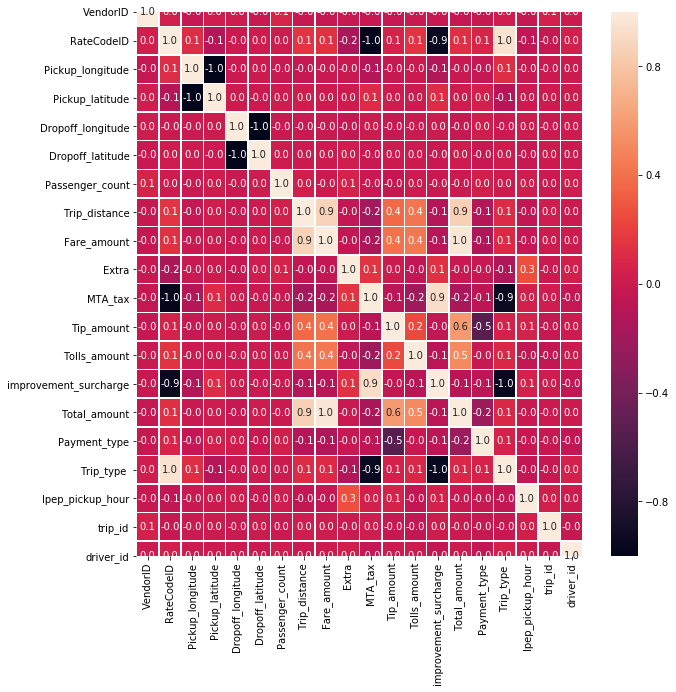

In [200]:
#Correlation heatmap

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

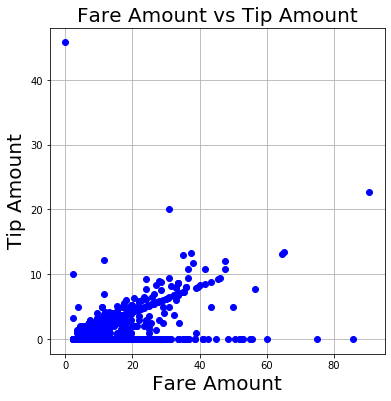

In [179]:
# SCATTER PLOT 

#Fare amount vs Tip Amount

fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df['Fare_amount'], df['Tip_amount'],'o',color = 'b')

plt.xlabel('Fare Amount', fontsize= 20)
plt.ylabel('Tip Amount', fontsize = 20)
plt.title('Fare Amount vs Tip Amount', fontdict = {'fontsize' : 20})

plt.grid()
plt.show()

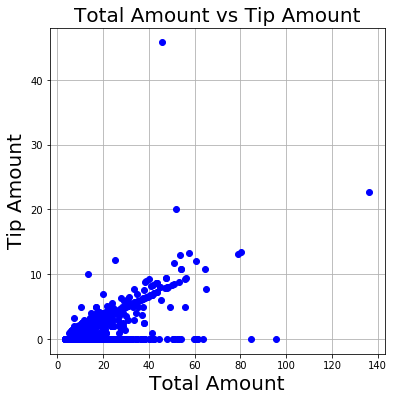

In [180]:
#Total amount vs Tip Amount

fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df['Total_amount'], df['Tip_amount'],'o',color = 'b')

plt.xlabel('Total Amount', fontsize= 20)
plt.ylabel('Tip Amount', fontsize = 20)
plt.title('Total Amount vs Tip Amount', fontdict = {'fontsize' : 20})

plt.grid()
plt.show()

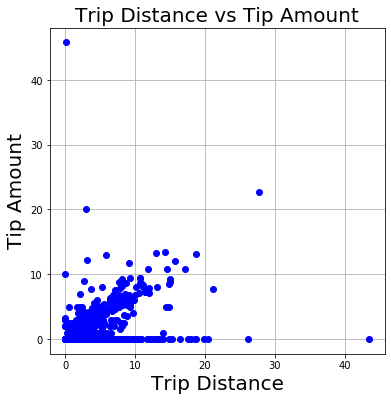

In [181]:

# Trip distance vs Tip Amount


fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df['Trip_distance'], df['Tip_amount'],'o',color = 'b')

plt.xlabel('Trip Distance', fontsize= 20)
plt.ylabel('Tip Amount', fontsize = 20)
plt.title('Trip Distance vs Tip Amount', fontdict = {'fontsize' : 20})

plt.grid()
plt.show()

In [201]:
#Linear regression

# X variables: select high correlated variables with Tip_amount 
# Y variable : Tip_amount
X = df.loc[:,["Fare_amount","Total_amount","Trip_distance"]]
y = df.loc[:,"Tip_amount"]

In [202]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [203]:
# Linear Regression
LinReg=LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
print(LinReg.intercept_)
print(LinReg.coef_)

-0.5934945095782165
[-0.81018724  0.80175323 -0.02583633]


In [207]:
y_pred = LinReg.predict(X_test)

In [208]:
print ("MAE:",sklearn.metrics.mean_absolute_error(y_test, y_pred))
print ("MSE:",sklearn.metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))) #RMSE more sensitive to outliers than MAE


MAE: 0.4707784753864259
MSE: 0.8526795945125896
RMSE: 0.9234065163905817
